# Bike Sharing - Linear Regression

In [284]:
# importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing warnings library to ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# importing libraries required for Linear Regression model building
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [285]:
# Reading the dataset
bike = pd.read_csv("day.csv")

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [286]:
# viewing basic information about the dataset

print("Rows     : ", bike.shape[0])
print("Columns  : ", bike.shape[1])
print("\nPrecentage wise missing values in each column:\n\n", 100*bike.isnull().sum()/len(bike.index))

Rows     :  730
Columns  :  16

Precentage wise missing values in each column:

 instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


**There is no missing values in the dataset**

In [287]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [288]:
# viewing column wise information e.g., datatype, non-null count etc.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [289]:
# Dropping following columns since they are not required in model building
# instant - record index number
# dteday - there are already year, month and weekday columns 
# casual, registered - Our target variable is a combination of both
# holiday - workingday variable already covering it's information

bike.drop(columns=['instant', 'dteday', 'holiday', 'casual', 'registered'], inplace=True)

In [290]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [291]:
# renaming columns for more clarification
bike.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count'}, inplace=True)

In [292]:
bike.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualisation 

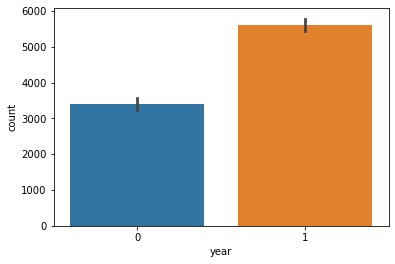

In [293]:
# plotting the year wise bar chart
# 2018 = 0, 2019 = 1
sns.barplot('year', 'count', data=bike)
plt.show()

**The above plot shows that the bike rental increased in 2019 as compared to 2018**

In [294]:
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
bike['month'] = bike['month'].map(months)

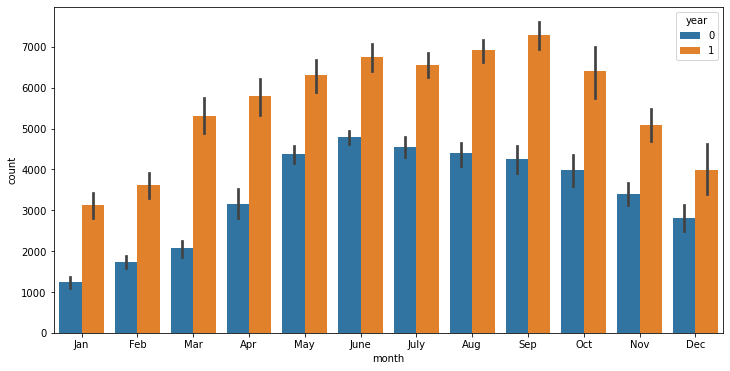

In [295]:
# plotting the month wise bar chart with combination of year
plt.figure(figsize=(12,6))
sns.barplot('month', 'count', hue='year', data=bike)
plt.show()

**The above plot shows that the popularity of bike rental increased every month of 2019 as compared to previous year. The maximum bikes were rented between March to October.**

In [296]:
# converting weekday numbers into names
days = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bike['weekday'] = bike['weekday'].map(days)

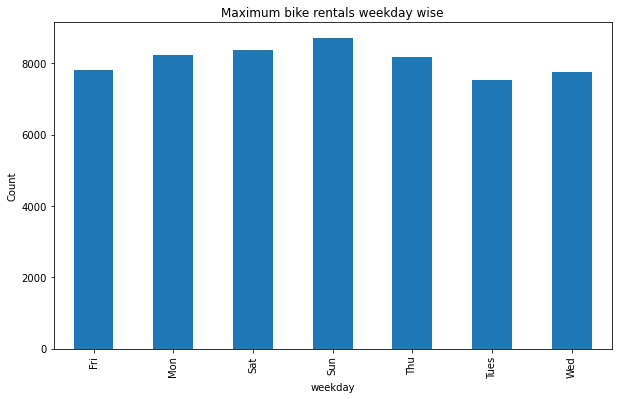

In [297]:
# Plotting bike rentals weekday wise
plt.figure(figsize=(10,6))
plt.title('Maximum bike rentals weekday wise')
plt.xlabel('Weekday')
plt.ylabel('Count')
bike.groupby('weekday')['count'].max().plot(kind='bar')
plt.show()

**The above plot shows that the bike rentals are maximum during Saturday and Sunday**

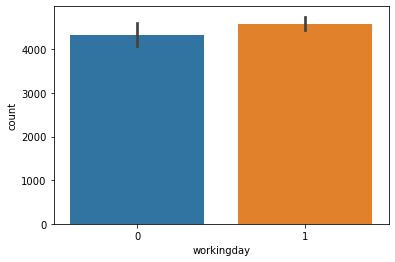

In [298]:
# Ploting the bike rentals on workingday 
# holiday = 0
# working day = 1
sns.barplot('workingday', 'count', data=bike)
plt.show()

- holiday = 0
- working day = 1

**The above plot shows that the bike renting is little high during the working days** 

In [299]:
weather = {1:'Clear', 2:'Mist', 3:'Light_snow', 4:'Heavy_snow'}
bike['weathersit'] = bike['weathersit'].map(weather)

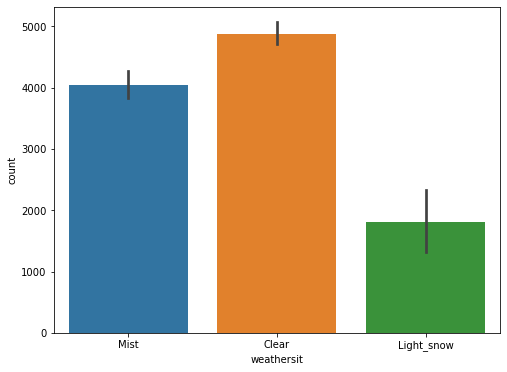

In [300]:
# plotting the bike rentals weatherwise
plt.figure(figsize=(8,6))
sns.barplot('weathersit', 'count', data=bike)
plt.show()

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**The above plot shows that bikes are more rented when weather is clear**

In [301]:
season = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
bike['season'] = bike['season'].map(season)

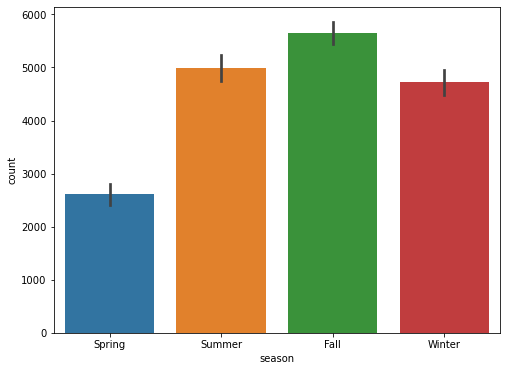

In [302]:
# plotting the bike rentals season wise
plt.figure(figsize=(8,6))
sns.barplot('season', 'count', data=bike)
plt.show()

**The above plot shows that bikes are more rented during the Fall season**

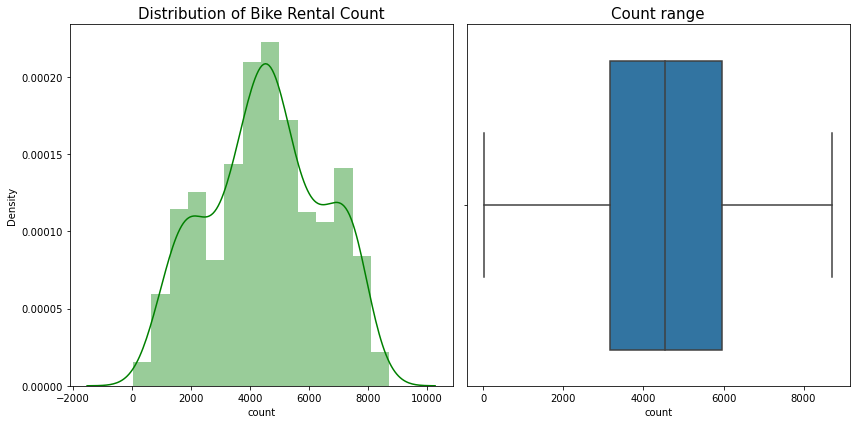

In [303]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(bike['count'], hist=True, kde=True, color='g', ax=axes[0])

sns.boxplot(bike['count'], ax=axes[1])
axes[0].set_title('Distribution of Bike Rental Count', fontsize=15)
axes[1].set_title('Count range', fontsize=15)
plt.tight_layout()
plt.show()

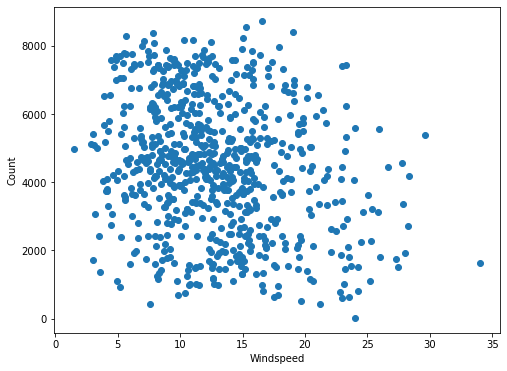

In [304]:
# Visualising the relation between windspeed and count
plt.figure(figsize=(8,6))
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.scatter('windspeed', 'count', data=bike)
plt.show()

**The above plot shows that `windspeed` and `count` has a negative correlation. When the `windspeed` is increasing, the number of bike rental decreases.**

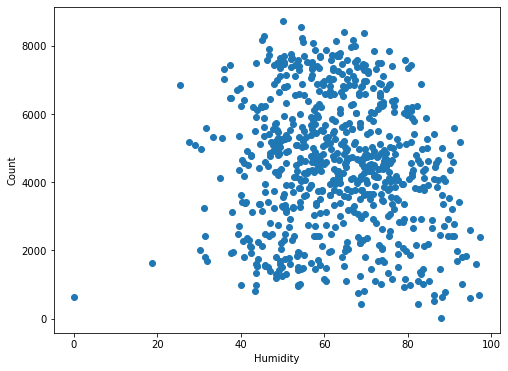

In [305]:
# Visualising the relation between humidity and count
plt.figure(figsize=(8,6))
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.scatter('humidity', 'count', data=bike)
plt.show()

**The above plot shows that there's almost no bike rental when humidity is low.**

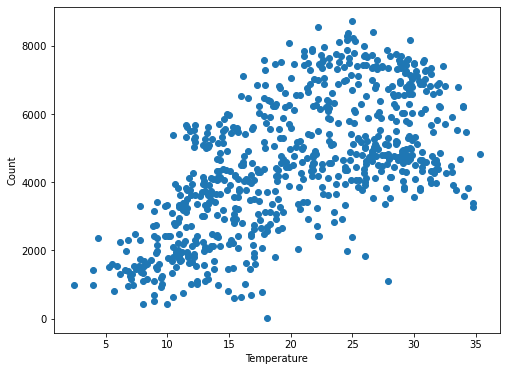

In [306]:
# Visualising the relation between temp and count
plt.figure(figsize=(8,6))
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.scatter('temp', 'count', data=bike)
plt.show()

**The above plot shows that the bike rental and temperature have a positive relation. The number of bike rental increases when the temperature increases.**

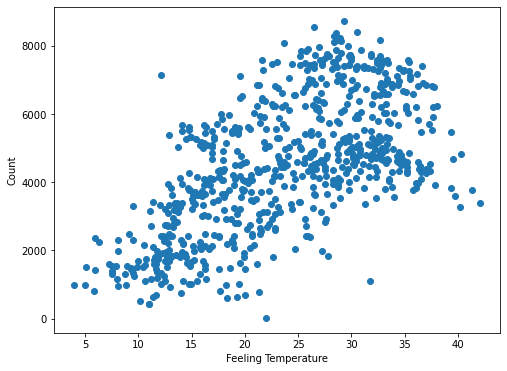

In [307]:
# Visualising the relation between atemp and count
plt.figure(figsize=(8,6))
plt.xlabel('Feeling Temperature')
plt.ylabel('Count')
plt.scatter('atemp', 'count', data=bike)
plt.show()

**Same as `temp`, `atempt` also have positive relation with count.**

### Visualising the relationship between other variables.

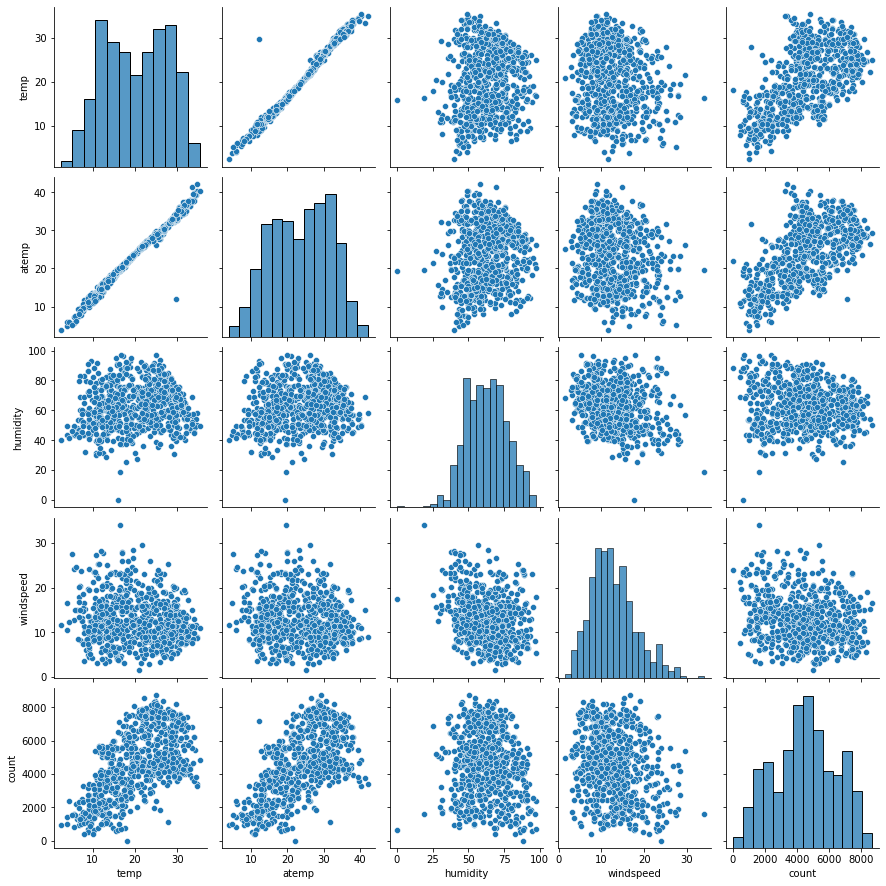

In [308]:
sns.pairplot(bike[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.show()

**The above pairplots on numerical variables show us the following:**
1. There is a very high correlation between `temp` and `atemp`.
2. `humity` also have positive correlation with `temp` and `atemp`.


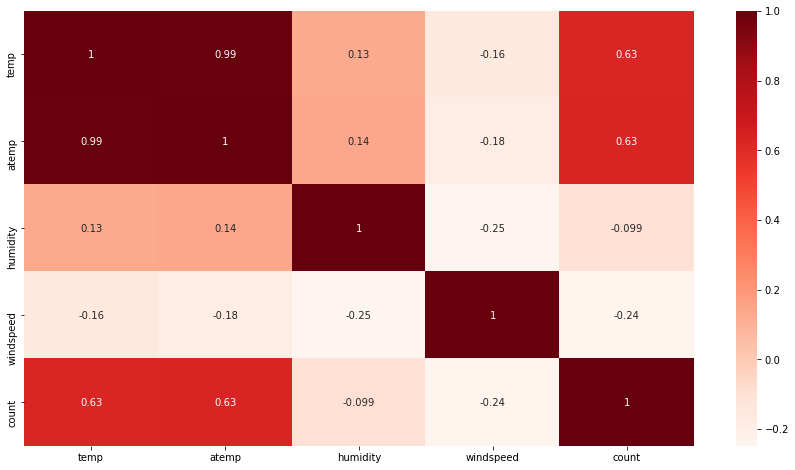

In [309]:
# checking the correlation of above numerical variables using heatmap
corr = bike.loc[:, ['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

**As we can see that `temp` and `atemp` are highly correlated to each other. We can drop `atemp` to avoid multicollinearity.**

In [310]:
# dropping atemp variable
bike.drop(columns=['atemp'], inplace=True)

In [311]:
bike.head()

,season,year,month,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,Jan,Sun,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Mon,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Tues,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Thu,1,Clear,9.305237,43.6957,12.522300,1600


## Preparing the data for Modeling

**Creating dummy variables from categorical variables**

In [312]:
# create dummy variables for season
season = pd.get_dummies(bike['season'], drop_first=True)

# concat the season df into the original one
bike = pd.concat([bike, season], axis=1)

# dropping the season variable
bike.drop(columns=['season'], inplace=True)

In [313]:
bike.head()

,year,month,weekday,workingday,weathersit,temp,humidity,windspeed,count,Spring,Summer,Winter
0,0,Jan,Sun,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,Mon,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,Tues,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,Wed,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,Thu,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [314]:
# create dummy variables for month
month = pd.get_dummies(bike['month'], drop_first=True)

# concat the month df into the original one
bike = pd.concat([bike, month], axis=1)

# dropping the month variable
bike.drop(columns=['month'], inplace=True)

In [315]:
bike.head()

,year,weekday,workingday,weathersit,temp,humidity,windspeed,count,Spring,Summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,Sun,0,Mist,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,Mon,0,Mist,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,Tues,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,Thu,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [316]:
# create dummy variables for weekday
weekday = pd.get_dummies(bike['weekday'], drop_first=True)

# concat the weekday df into the original one
bike = pd.concat([bike, weekday], axis=1)

# dropping the weekday variable
bike.drop(columns=['weekday'], inplace=True)

In [317]:
bike.head()

,year,workingday,weathersit,temp,humidity,windspeed,count,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed
0,0,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [318]:
# create dummy variables for weathersit
weathersit = pd.get_dummies(bike['weathersit'], drop_first=True)

# concat the weathersit df into the original one
bike = pd.concat([bike, weathersit], axis=1)

# dropping the weathersit variable
bike.drop(columns=['weathersit'], inplace=True)

In [319]:
bike.head()

,year,workingday,temp,humidity,windspeed,count,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light_snow,Mist
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [320]:
bike.shape

(730, 28)

### splitting the data set into train-test

In [321]:
# splitting the data into train and test 
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [322]:
# Rescalling the variables

# initiating an object
scaler = StandardScaler()

# Create a list of numeric variables where values are not only 0 or 1
num_vars = ['temp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [323]:
df_train.describe()

,year,workingday,temp,humidity,windspeed,count,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light_snow,Mist
count,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,-2.757054e-16,-3.459107e-16,-2.333645e-16,-5.398732e-17,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.500429,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [324]:
# X_train, y_train
y_train = df_train.pop('count')
X_train = df_train

In [325]:
# Running RFE (Recursive Feature Elimination) for automated selection
lm = LinearRegression()
lm.fit(X_train, y_train)

# For RFE with output number of variable equal to 10
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [326]:
# viewing recommended variables by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('Spring', True, 1),
 ('Summer', False, 7),
 ('Winter', False, 2),
 ('Aug', False, 11),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tues', False, 12),
 ('Wed', False, 13),
 ('Light_snow', True, 1),
 ('Mist', True, 1)]

In [327]:
# collecting columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['year', 'workingday', 'temp', 'Spring', 'July', 'Sep', 'Mon', 'Sun',
       'Light_snow', 'Mist'],
      dtype='object')

In [328]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['humidity', 'windspeed', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sat', 'Thu', 'Tues', 'Wed'],
      dtype='object')

In [329]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [330]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [331]:
# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [332]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          3.30e-179
Time:                        11:25:56   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6092      0.122     -4.974      0.0

**`Mon` is insignificant in presence of other variables. It can be dropped.**

In [333]:
# Dropping Mon
X_train1 = X_train_rfe.drop('Mon', axis=1)

### Rebuilding the model again 

In [334]:
# adding the constant
X_train_lm = sm.add_constant(X_train1)

# Running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()

In [335]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.22e-179
Time:                        11:26:00   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4002      0.054     -7.374      0.0

**The p-value on all the variable is below 0.05 which is good**

In [336]:
# dropping the const, since it's not required in VIF calculation
X_train_new = X_train_lm.drop('const', axis=1)

In [337]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,workingday,2.28
2,temp,2.02
3,Spring,2.02
0,year,1.80
8,Mist,1.50
4,July,1.35
6,Sun,1.28
5,Sep,1.17
7,Light_snow,1.06


**The above VIF result shows that all the variable have VIF less than 5 which is good.**

### Residual Analysis of the train data


In [338]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

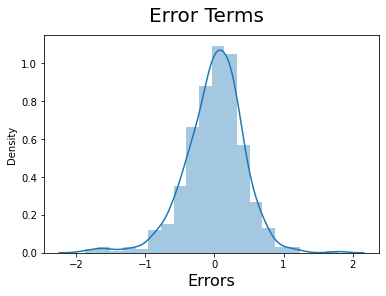

In [339]:
# plotting the histogram for the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)            # plot heading
plt.xlabel('Errors', fontsize=16)                   # X-label

**The above plot on error terms shows that it is centered around 0**

### Making Predictions

In [340]:
# Applying the scaling on the test sets
num_vars = ['temp', 'humidity', 'windspeed', 'count']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [341]:
# Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test

In [342]:
# Now use our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [343]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

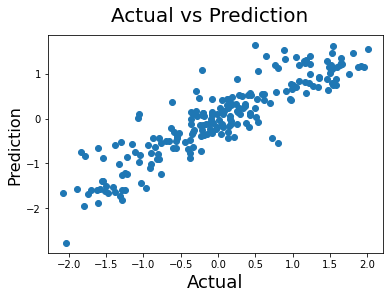

In [344]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Actual vs Prediction', fontsize=20)     # Plot heading
plt.xlabel('Actual', fontsize=18)                     # X-label
plt.ylabel('Prediction', fontsize=16)                 # Y-label
plt.show()

In [345]:
# Calculating R-squared score on the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8075114920782749

**We can see that the R-squared of test data is very close to the training data.**

**The model shows us that predicted values have linear relationship with the actual values.**

## Conclusion:

**Our model shows that the following factors are beneficial for the Bike Rental demand:**

1. workingdays     
2. temperature    
3. Spring       
4. July       
5. September      
6. Sunday     
7. Mist       